<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/K_Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

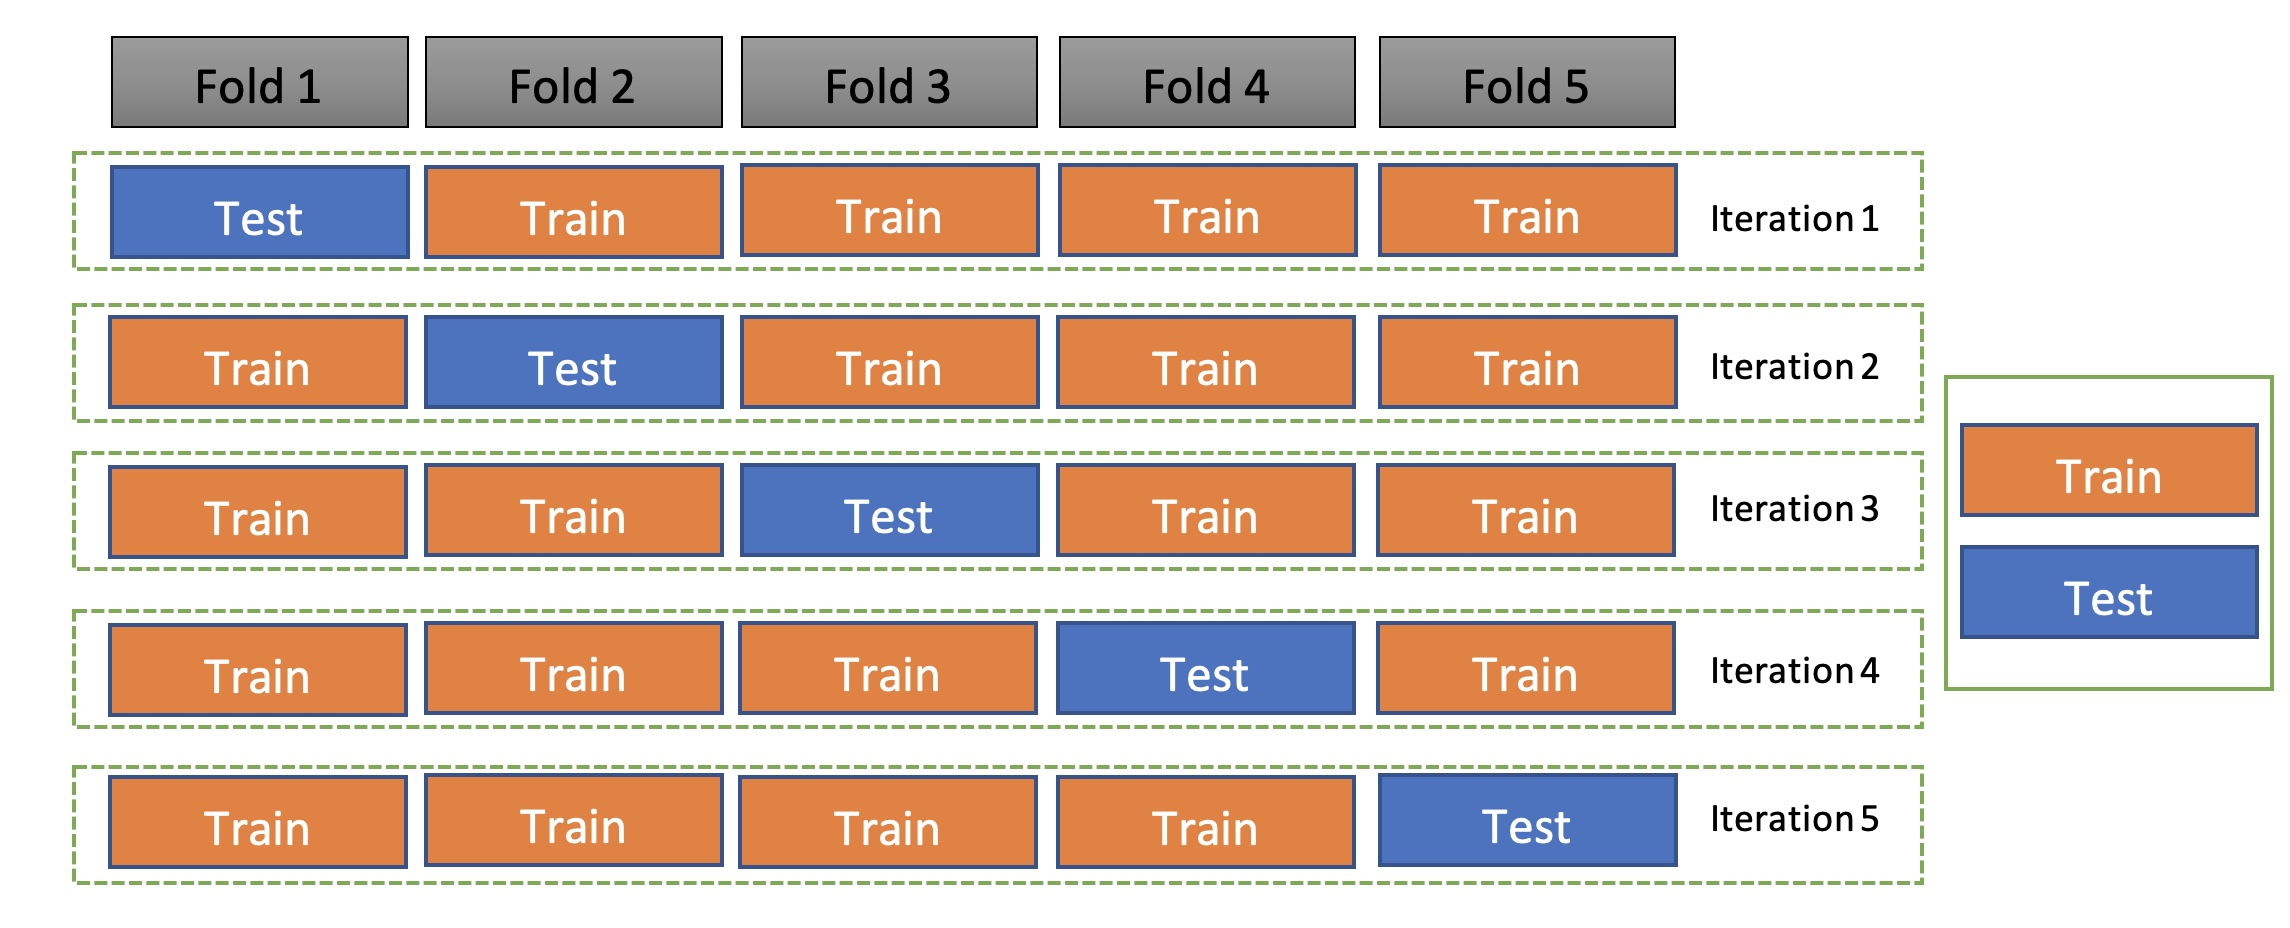

[Bangla Link](https://datasinsightsbd.gitbook.io/dsbook/supervised-ml/k-fold)

[Video Link](https://www.youtube.com/watch?v=fSytzGwwBVw)

[Video Link](https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=1189s)

In [55]:
import numpy
from sklearn.datasets import load_digits

digits = load_digits()

In [56]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [58]:
len(x_train)

1257

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(solver='saga', max_iter=1300)

lm.fit(x_train, y_train)

lm.score(x_test, y_test)

0.9722222222222222

In [60]:
# Support vector machine
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9962962962962963

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators=50)

rm.fit(x_train, y_train)

rm.score(x_test, y_test)

0.9648148148148148

In [62]:
# K Fold Cross Validation
# n_splits is number of fold
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [63]:
# Simple testing KFold model

for train_index, test_index in kf.split([1, 2, 3, 4, 5, 6, 7, 8, 9]):
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [64]:
# Create a function

def get_score(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  return model.score(x_test, y_test)

In [65]:
get_score(LogisticRegression(solver='saga', max_iter=1300), x_train, x_test, y_train, y_test)

0.9722222222222222

In [66]:
get_score(SVC(), x_train, x_test, y_train, y_test)

0.9962962962962963

In [67]:
get_score(RandomForestClassifier(n_estimators=50), x_train, x_test, y_train, y_test)

0.9740740740740741

In [69]:
# for n_split calculate each model value for each fold

from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=3)

for train_index, test_index in fold.split(digits.data, digits.target):
  x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]

  print(get_score(LogisticRegression(solver='saga', max_iter=1300), x_train, x_test, y_train, y_test))
  print(get_score(SVC(), x_train, x_test, y_train, y_test))
  print(get_score(RandomForestClassifier(n_estimators=50), x_train, x_test, y_train, y_test))
  print()

0.9232053422370617
0.9649415692821369
0.9432387312186978

0.9415692821368948
0.9799666110183639
0.9432387312186978

0.9181969949916527
0.9649415692821369
0.9282136894824707



In [70]:
# Now Store the above score in different array

logi = []
supp = []
rand = []

for train_index, test_index in fold.split(digits.data, digits.target):
  x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]

  logi.append(get_score(LogisticRegression(solver='saga', max_iter=1300), x_train, x_test, y_train, y_test))
  supp.append(get_score(SVC(), x_train, x_test, y_train, y_test))
  rand.append(get_score(RandomForestClassifier(n_estimators=50), x_train, x_test, y_train, y_test))

In [71]:
# print that three array

logi

[0.9215358931552587, 0.9415692821368948, 0.9198664440734557]

In [72]:
supp

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [73]:
rand

[0.9298831385642737, 0.9532554257095158, 0.9265442404006677]

In [74]:
# the above score finding work done by a singel method by cross_val_score

from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score(LogisticRegression(solver='saga', max_iter=1000), digits.data, digits.target)

array([0.92222222, 0.86944444, 0.94707521, 0.93871866, 0.89972145])

In [80]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [81]:
cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target)

array([0.925     , 0.90277778, 0.95821727, 0.96100279, 0.93036212])

Parameter(n_estimators) Tunning For Random Forest Classifier

In [82]:
cross_val_score(RandomForestClassifier(n_estimators=30), digits.data, digits.target)

array([0.91111111, 0.87777778, 0.95543175, 0.96100279, 0.92200557])

In [83]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.93055556, 0.90833333, 0.95821727, 0.95264624, 0.91364903])

In [84]:
cross_val_score(RandomForestClassifier(n_estimators=60), digits.data, digits.target)

array([0.925     , 0.91666667, 0.94150418, 0.97493036, 0.91922006])